# Testing the QNetwork on a simple game

The QNetwork module implements a DQN Agent that learns which action is better in a specific state. The QNetwork is able to memorize experiences and explorations, and train on them.

## The game
The test contained in test_qnetwork_movement.py tests the ability of the QNetwork to learn to reach the position $(0.5, 0.5)$ while spawning at random coordinates in $[0, 1]$.

## Training the agent

### Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as func
from test_qnetwork_movement import test
from QNetwork import QNetwork

### Parameters
The environment is defined by the states and the possible actions.
A state here is defined by two coordinates $(x, y)$, and will be encoded in a tensor of size (2, ). Therefore, a batch of states can be encoded as a tensor of shape (Batch_size, 2).
  
There are 5 possible actions in any state: 0 (Go up), 1 (Go right), 2 (Go down), 3 (Go left), 4 (Stay at the same position).

The test has three parameters: The number of movements that the agent is allowed to do, the length of each step, and the number of episodes on which the agent trains.

In [2]:
state_dim, nb_actions = 2, 5
movements = 10
step = 0.01
nb_episodes = 1000

### Creating the agent
Let's first create the QNetwork that will be tested

#### Create the torch neural network
A QNetwork lets us create our own model for training to be able to adjust hyperparameters:

In [3]:
class Net(nn.Module):
    def __init__(self, state_dim, nb_actions):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(state_dim, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc4 = nn.Linear(64, nb_actions)
    
    def forward(self, batch):
        batch = func.relu(self.fc1(batch))
        batch = func.relu(self.fc2(batch))
        batch = self.fc4(batch)
        return batch

In [4]:
net = Net(state_dim, nb_actions)

#### Create the QNetwork object

In [5]:
agent = QNetwork(net, state_dim, movements, lr=0.1)

### Checking that the setup works
Let's run the test on small values to make sure everything works

Episodes completed:  |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


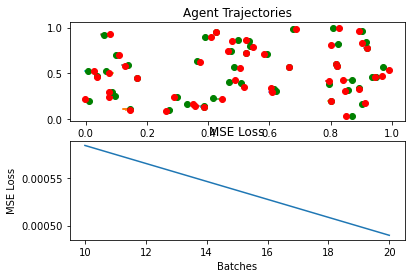

In [6]:
loss = test(agent, 100, 2)

(Of course it isn't any good for now)

### Start a real training
Now that everything's working, let's have a real training session !

In [7]:
nb_episodes = 5000
movements = 200

In [8]:
agent.set_learning_rate(1)
agent.discount = 0.85
agent.epsilon = 0.1

Episodes completed:  |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


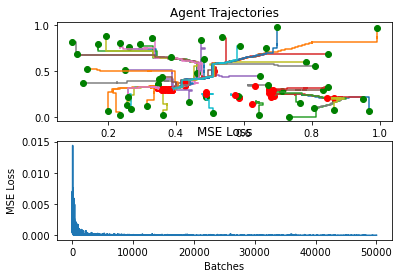

In [9]:
loss = test(agent, movements, nb_episodes)

Now that the Agent has lived so many experiences and memorized them, we can train it without playing new episodes

In [ ]:
agent.train_on_memory(100, 10)

Training on  10  from the replay memory..
Epoch 1/10 |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Epoch 2/10 |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Epoch 3/10 |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Epoch 4/10 |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Epoch 5/10 |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 
Epoch 6/10 |████████████████████████████████████------------------------------------------------------| 40.1% 

Let's test the agent's performance now

Episodes completed:  |██████████████████████████████████████████████████████████████████████████████████████████| 100.0% 


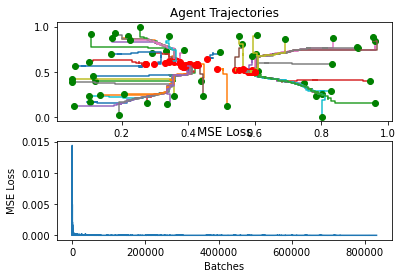

In [15]:
loss = test(agent, 1, 1)

There is a <strong>clear</strong> improvement

#### Save the model
If the QAgent yielded good results, save its parameters in a file:

In [12]:
filename = "?.model"

In [13]:
path = "Models/" + filename
torch.save(net.state_dict(), path)

OSError: [Errno 22] Invalid argument: 'Models/?.model'

## A few results
Those trajectories were obtained with 400 movements allowed and 20 000 episodes of training: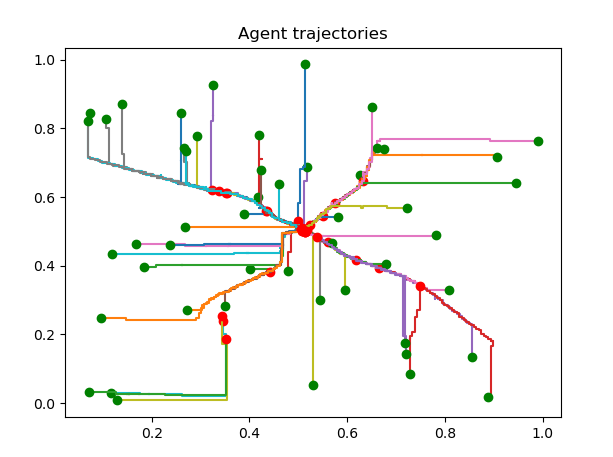